# Applied Neural Networks Homework 3
Leslie Kerby<br/>
Katherine Wilsdon

**MNIST Digits and Keras**</br>
Import in the MNIST digits dataset (70,000 images, each 28x28 pixels). Preprocess the data as necessary. The training set should have 60k images and the test set 10k. Also create a validation set within the training set -- using 10% of the training data. 


In [0]:
# normalize to gradiant decent and flatten it
#Wide 1 hidden layer
#Deep 5 hidden layers
# plot across epochs for difference between functional API and sequential

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


from keras.datasets import mnist

(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [248]:
X_train_full.shape

(60000, 28, 28)

In [249]:
y_train_full.shape

(60000,)

In [250]:
X_test.shape

(10000, 28, 28)

In [251]:
y_test.shape

(10000,)

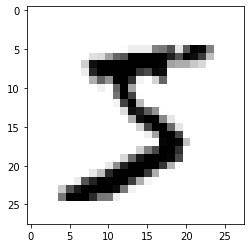

In [252]:
plt.imshow(X_train_full[0], cmap="binary")

In [253]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
# 0. Preprocess data
# Only execute this cell once!
X_train_full = X_train_full/255
X_test = X_test/255

In [255]:
X_train_full[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [256]:
from collections import Counter
Counter(y_train_full)

Counter({0: 5923,
         1: 6742,
         2: 5958,
         3: 6131,
         4: 5842,
         5: 5421,
         6: 5918,
         7: 6265,
         8: 5851,
         9: 5949})

In [0]:
# Reshape to 1D, or flatten, before sending to keras
X_train_full = X_train_full.reshape(-1,784)
X_test = X_test.reshape(-1,784)

In [258]:
# Create validation set of 5000 images
from sklearn.model_selection import train_test_split
X_train_tr, X_train_v, y_train_tr, y_train_v = train_test_split(X_train_full,
                                                                y_train_full,
                                                                test_size=.10,
                                                                random_state=42)
X_train_tr.shape

(54000, 784)

In [259]:
X_train_v.shape

(6000, 784)

### Sequential API
Using the Keras Sequential API, create a neural network with two hidden layers of 500 neurons each. Train it for 30 epochs. Graph the accuracy and loss for the training and validation sets. Does your model become overfit? If so, at about what epoch? Re-train your neural network for that number of epochs. 

Now test your neural network on your testing data. What accuracy do you achieve? Is it about the same as the accuracy on the validation data?

In [0]:
# Training a NN with Keras
# 0. Preprocessing data
# 1. Create model (NN architecture)
# 2. Compile (specify loss functions, optimizers, metrics)
# 3. Fit (training & validation data, batch_size, # epochs)
# 3+. Evaluate 

In [0]:
# Create model
model = keras.models.Sequential()
model.add(keras.layers.Dense(500, activation='relu', input_shape=(784,), name='First_Hidden_Layer'))
model.add(keras.layers.Dense(500, activation='relu',name='Second_Hidden_Layer'))
model.add(keras.layers.Dense(10,activation="softmax",name="Output_Layer"))

In [262]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
First_Hidden_Layer (Dense)   (None, 500)               392500    
_________________________________________________________________
Second_Hidden_Layer (Dense)  (None, 500)               250500    
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


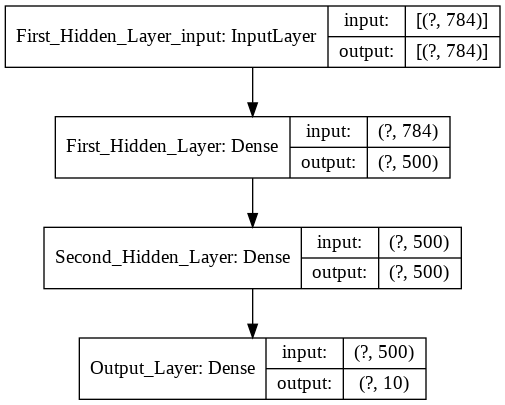

In [263]:
keras.utils.plot_model(model,show_shapes=True)

In [0]:
# 2. Compile model
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])

In [265]:
# 3. Fit (ie learn) on data
history = model.fit(X_train_tr,y_train_tr, epochs=30, batch_size=32, validation_data=(X_train_v,y_train_v))

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 5s 85us/sample - loss: 0.5948 - accuracy: 0.8532 - val_loss: 0.3116 - val_accuracy: 0.9113
Epoch 2/30
54000/54000 [==============================] - 4s 80us/sample - loss: 0.2846 - accuracy: 0.9196 - val_loss: 0.2478 - val_accuracy: 0.9302
Epoch 3/30
54000/54000 [==============================] - 4s 80us/sample - loss: 0.2335 - accuracy: 0.9339 - val_loss: 0.2146 - val_accuracy: 0.9407
Epoch 4/30
54000/54000 [==============================] - 4s 81us/sample - loss: 0.1997 - accuracy: 0.9431 - val_loss: 0.1872 - val_accuracy: 0.9455
Epoch 5/30
54000/54000 [==============================] - 4s 78us/sample - loss: 0.1737 - accuracy: 0.9506 - val_loss: 0.1689 - val_accuracy: 0.9502
Epoch 6/30
54000/54000 [==============================] - 4s 76us/sample - loss: 0.1542 - accuracy: 0.9559 - val_loss: 0.1490 - val_accuracy: 0.9583
Epoch 7/30
54000/54000 [==============================] -

Text(0.5, 1.0, 'Sequential API for 30 Epochs')

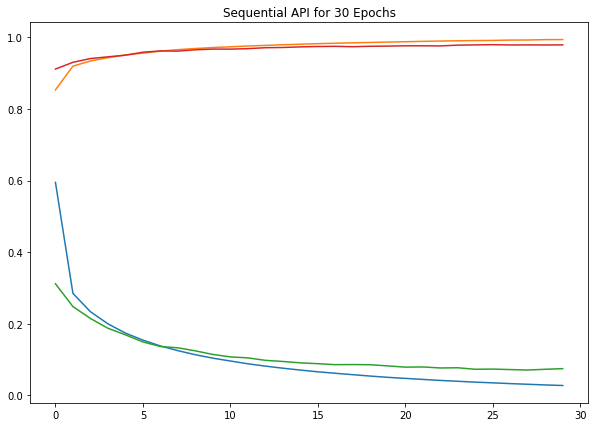

In [266]:
plt.plot(pd.DataFrame(history.history))
plt.gcf().set_size_inches(10,7)
plt.title("Sequential API for 30 Epochs")

Does your model become overfit? If so, at about what epoch? Re-train your neural network for that number of epochs.

Yes, the model is overfit. I think the model becomes overfit after epoch 11. 

<pre>
Epoch     Training_tr     Test     Difference
9           0.9693       0.9652      0.0041
10          0.9714       0.9669      0.0045
11          0.9736       0.9696      0.0040
12          0.9760       0.9705      0.0052
15          0.9924       0.9770      0.9770
</pre>

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
# Create model
model = keras.models.Sequential()
model.add(keras.layers.Dense(500, activation='relu', input_shape=(784,), name='First_Hidden_Layer'))
model.add(keras.layers.Dense(500, activation='relu',name='Second_Hidden_Layer'))
model.add(keras.layers.Dense(10,activation="softmax",name="Output_Layer"))

In [0]:
# 2. Compile model
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])

In [270]:
# 3. Fit (ie learn) on data
history2 = model.fit(X_train_tr,y_train_tr, epochs=11, batch_size=32, validation_data=(X_train_v,y_train_v))

Train on 54000 samples, validate on 6000 samples
Epoch 1/11
54000/54000 [==============================] - 5s 89us/sample - loss: 0.5948 - accuracy: 0.8532 - val_loss: 0.3116 - val_accuracy: 0.9113
Epoch 2/11
54000/54000 [==============================] - 5s 85us/sample - loss: 0.2846 - accuracy: 0.9196 - val_loss: 0.2478 - val_accuracy: 0.9303
Epoch 3/11
54000/54000 [==============================] - 5s 84us/sample - loss: 0.2335 - accuracy: 0.9339 - val_loss: 0.2147 - val_accuracy: 0.9407
Epoch 4/11
54000/54000 [==============================] - 4s 81us/sample - loss: 0.1997 - accuracy: 0.9431 - val_loss: 0.1873 - val_accuracy: 0.9455
Epoch 5/11
54000/54000 [==============================] - 4s 83us/sample - loss: 0.1737 - accuracy: 0.9506 - val_loss: 0.1689 - val_accuracy: 0.9502
Epoch 6/11
54000/54000 [==============================] - 4s 81us/sample - loss: 0.1542 - accuracy: 0.9559 - val_loss: 0.1489 - val_accuracy: 0.9587
Epoch 7/11
54000/54000 [==============================] -

In [271]:
test = model.evaluate(X_test_scal[:,:], y_test)
test

10000/10000 [==============================] - 1s 62us/sample - loss: 0.9751 - accuracy: 0.8533


[0.9751242963314056, 0.8533]

Text(0.5, 1.0, 'Sequential API for 11 Epochs')

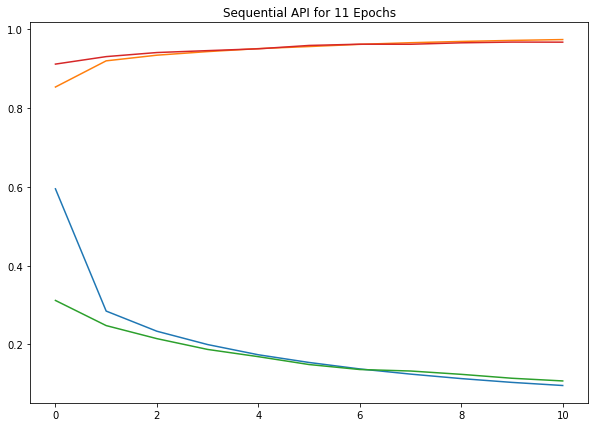

In [272]:
plt.plot(pd.DataFrame(history2.history))
plt.gcf().set_size_inches(10,7)
plt.title("Sequential API for 11 Epochs")

In [273]:
# Now check test accuracy
test = model.evaluate(X_test,y_test)
test

10000/10000 [==============================] - 1s 55us/sample - loss: 0.1046 - accuracy: 0.9695


[0.10457455997876823, 0.9695]

What accuracy do you achieve? Is it about the same as the accuracy on the validation data?

The average between the training, validation, and testing sets are 0.9707 with a standard deviation of 0.0025.

<pre>
Epoch     Training_tr     Training_v    Difference      Test     Difference 
11          0.9736         0.9690        0.0046        0.9696      0.0040
</pre>


### Functional API
Now create a deep and wide neural network using the Keras Functional API (exact architecture left up to you). Train it for the appropriate number of epochs and plot the accuracy/loss vs epoch. Find the accuracy on the test data and compare it to your accuracy for your sequential network.

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
# Scale data for gradient descent
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_tr_scal = scaler.fit_transform(X_train_tr)
# remember only use training training data for scaler fit
X_train_v_scal  = scaler.transform(X_train_v)
X_test_scal  = scaler.transform(X_test)

In [0]:
# Modify for multiple inputs
input_A = keras.layers.Input(shape=(784,), name="wide_input")
input_B = keras.layers.Input(shape=(784,), name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu", name="Hidden_Layer_1")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu", name="Hidden_Layer_2")(hidden1)
hidden3 = keras.layers.Dense(30, activation="relu", name="Hidden_Layer_3")(hidden2)
hidden4 = keras.layers.Dense(30, activation="relu", name="Hidden_Layer_4")(hidden3)
hidden5 = keras.layers.Dense(30, activation="relu", name="Hidden_Layer_5")(hidden4)
concat = keras.layers.Concatenate()([input_A, hidden5])
output = keras.layers.Dense(10,activation="softmax",name="Output_Layer")(concat)
model2 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [277]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 784)]        0                                            
__________________________________________________________________________________________________
Hidden_Layer_1 (Dense)          (None, 30)           23550       deep_input[0][0]                 
__________________________________________________________________________________________________
Hidden_Layer_2 (Dense)          (None, 30)           930         Hidden_Layer_1[0][0]             
__________________________________________________________________________________________________
Hidden_Layer_3 (Dense)          (None, 30)           930         Hidden_Layer_2[0][0]             
______________________________________________________________________________________________

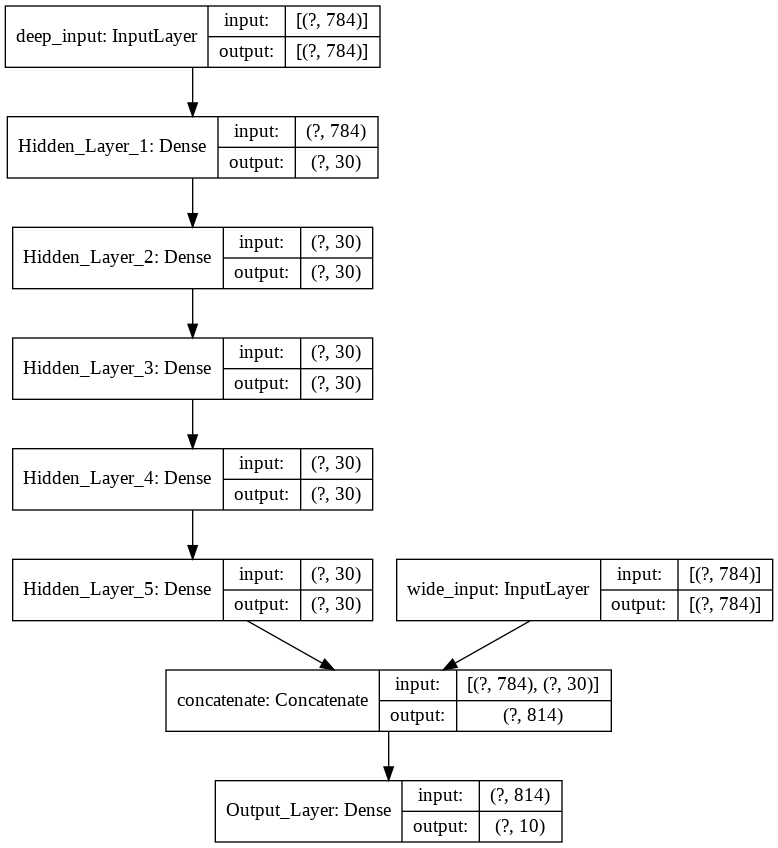

In [278]:
keras.utils.plot_model(model2,show_shapes=True)

In [0]:
model2.compile(loss="sparse_categorical_crossentropy",optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

In [280]:
X_train_tr.shape

(54000, 784)

In [281]:
history3 = model2.fit((X_train_tr_scal[:,:], X_train_tr_scal[:,:]) ,y_train_tr, epochs=36, validation_data=((X_train_v_scal[:,:], X_train_v_scal[:,:]),y_train_v))

Train on 54000 samples, validate on 6000 samples
Epoch 1/36
54000/54000 [==============================] - 6s 105us/sample - loss: 1.0771 - accuracy: 0.6864 - val_loss: 0.6367 - val_accuracy: 0.8268
Epoch 2/36
54000/54000 [==============================] - 5s 96us/sample - loss: 0.5545 - accuracy: 0.8489 - val_loss: 0.4899 - val_accuracy: 0.8668
Epoch 3/36
54000/54000 [==============================] - 5s 96us/sample - loss: 0.4641 - accuracy: 0.8719 - val_loss: 0.4320 - val_accuracy: 0.8802
Epoch 4/36
54000/54000 [==============================] - 5s 96us/sample - loss: 0.4205 - accuracy: 0.8825 - val_loss: 0.4001 - val_accuracy: 0.8888
Epoch 5/36
54000/54000 [==============================] - 5s 100us/sample - loss: 0.3935 - accuracy: 0.8892 - val_loss: 0.3794 - val_accuracy: 0.8930
Epoch 6/36
54000/54000 [==============================] - 5s 96us/sample - loss: 0.3748 - accuracy: 0.8944 - val_loss: 0.3649 - val_accuracy: 0.8977
Epoch 7/36
54000/54000 [==============================]

In [282]:
test2 = model2.evaluate([X_test_scal[:,:],X_test_scal[:,:]] ,[y_test])
test2

10000/10000 [==============================] - 1s 69us/sample - loss: 0.2876 - accuracy: 0.9214


[0.28755312001109123, 0.9214]

Text(0.5, 1.0, 'Functional API for 50 Epochs')

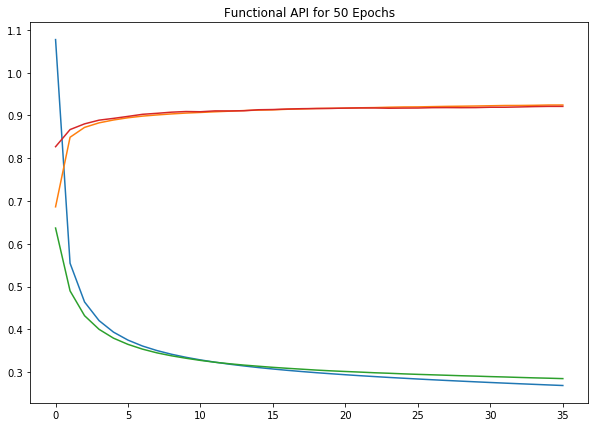

In [283]:
plt.plot(pd.DataFrame(history3.history))
plt.gcf().set_size_inches(10,7)
plt.title("Functional API for 50 Epochs")

Text(0.5, 1.0, 'Sequential API vs Functional API')

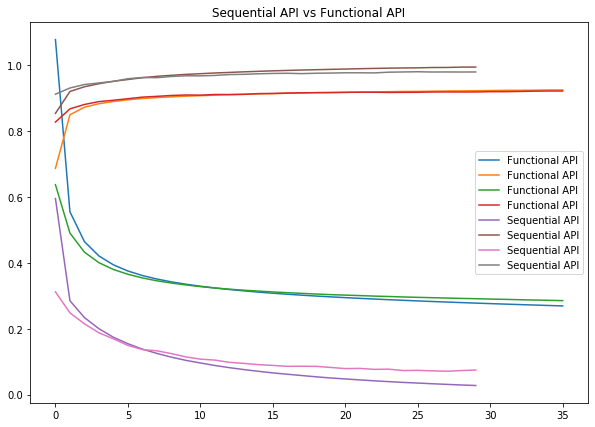

In [284]:
plt.plot(pd.DataFrame(history3.history), label='Functional API')
plt.plot(pd.DataFrame(history.history), label='Sequential API')
plt.legend()
plt.gcf().set_size_inches(10,7)
plt.title("Sequential API vs Functional API")

In [285]:
print("The Sequential API had one input with 2 hidden layers with a dimensionality of the output space of 500.")
print("The Functional API contained a wide input and a deep input that used 5 hidden layers with a dimensionality of the output space of 30.")
print("The Sequential API with a new architecture had around a 4.8% better accuracy for the testing set of " + str(test[1]) + " compared to the Functional\nAPI at " + str(test2[1]) + ".")

The Sequential API had one input with 2 hidden layers with a dimensionality of the output space of 500.
The Functional API contained a wide input and a deep input that used 5 hidden layers with a dimensionality of the output space of 30.
The Sequential API with a new architecture had around a 4.8% better accuracy for the testing set of 0.9695 compared to the Functional
API at 0.9214.


### New Architecture
Lastly, try one other architecture (add hidden layers, add neurons, and/or some other NN architecture) and train, evaluate, and compare your new neural network as you did previously.

 

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
# Modify for multiple inputs
input_A = keras.layers.Input(shape=(784,), name="wide_input")
input_B = keras.layers.Input(shape=(784,), name="deep_input")
hidden1B = keras.layers.Dense(50, activation="relu", name="Hidden_Layer_1_Input_B")(input_B)
hidden1A = keras.layers.Dense(50, activation="relu", name="Hidden_Layer_1_Input_A")(input_A)
hidden2 = keras.layers.Dense(50, activation="relu", name="Hidden_Layer_2")(hidden1B)
hidden3 = keras.layers.Dense(50, activation="relu", name="Hidden_Layer_3")(hidden2)
hidden4 = keras.layers.Dense(50, activation="relu", name="Hidden_Layer_4")(hidden3)
hidden5 = keras.layers.Dense(50, activation="relu", name="Hidden_Layer_5")(hidden4)
hidden6 = keras.layers.Dense(50, activation="relu", name="Hidden_Layer_6")(hidden5)
hidden7 = keras.layers.Dense(50, activation="relu", name="Hidden_Layer_7")(hidden6)
hidden8 = keras.layers.Dense(50, activation="relu", name="Hidden_Layer_8")(hidden7)
hidden9 = keras.layers.Dense(50, activation="relu", name="Hidden_Layer_9")(hidden8)
hidden10 = keras.layers.Dense(50, activation="relu", name="Hidden_Layer_10")(hidden9)
concat = keras.layers.Concatenate()([hidden1A, hidden10])
output = keras.layers.Dense(10,activation="softmax",name="Output_Layer")(concat)
model3 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [288]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 784)]        0                                            
__________________________________________________________________________________________________
Hidden_Layer_1_Input_B (Dense)  (None, 50)           39250       deep_input[0][0]                 
__________________________________________________________________________________________________
Hidden_Layer_2 (Dense)          (None, 50)           2550        Hidden_Layer_1_Input_B[0][0]     
__________________________________________________________________________________________________
Hidden_Layer_3 (Dense)          (None, 50)           2550        Hidden_Layer_2[0][0]             
______________________________________________________________________________________________

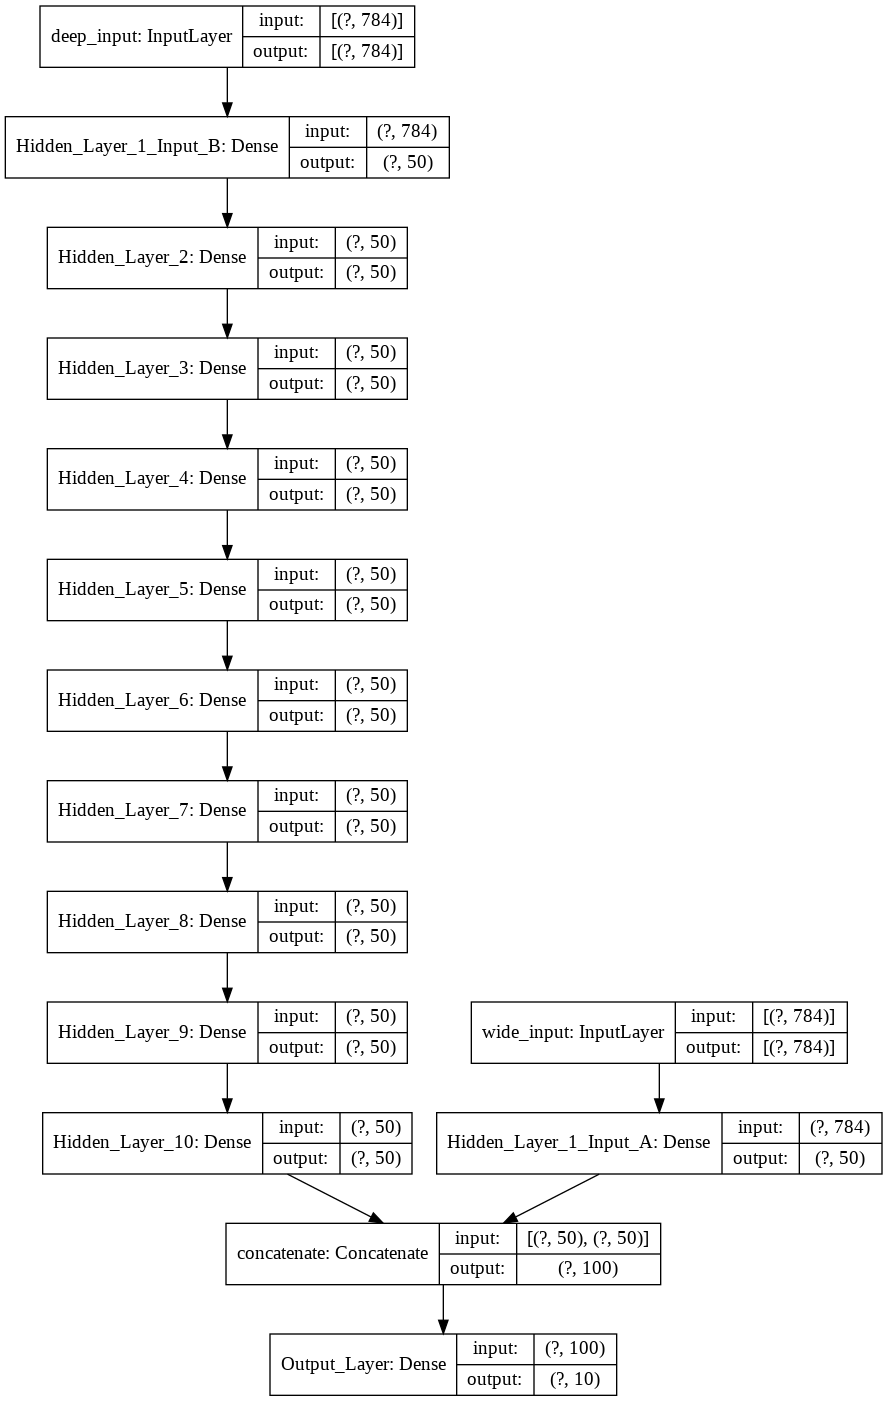

In [289]:
keras.utils.plot_model(model3,show_shapes=True)

In [0]:
model3.compile(loss="sparse_categorical_crossentropy",optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

In [291]:
history10 = model3.fit((X_train_tr_scal[:,:], X_train_tr_scal[:,:]) ,y_train_tr, epochs=26, validation_data=((X_train_v_scal[:,:], X_train_v_scal[:,:]),y_train_v))

Train on 54000 samples, validate on 6000 samples
Epoch 1/26
54000/54000 [==============================] - 7s 134us/sample - loss: 1.4012 - accuracy: 0.5955 - val_loss: 0.8572 - val_accuracy: 0.7800
Epoch 2/26
54000/54000 [==============================] - 6s 108us/sample - loss: 0.6828 - accuracy: 0.8263 - val_loss: 0.5716 - val_accuracy: 0.8500
Epoch 3/26
54000/54000 [==============================] - 6s 112us/sample - loss: 0.5090 - accuracy: 0.8656 - val_loss: 0.4623 - val_accuracy: 0.8750
Epoch 4/26
54000/54000 [==============================] - 6s 114us/sample - loss: 0.4305 - accuracy: 0.8826 - val_loss: 0.4044 - val_accuracy: 0.8883
Epoch 5/26
54000/54000 [==============================] - 6s 112us/sample - loss: 0.3845 - accuracy: 0.8929 - val_loss: 0.3675 - val_accuracy: 0.8970
Epoch 6/26
54000/54000 [==============================] - 6s 117us/sample - loss: 0.3532 - accuracy: 0.9001 - val_loss: 0.3416 - val_accuracy: 0.9028
Epoch 7/26
54000/54000 [===========================

In [292]:
test3 = model3.evaluate([X_test_scal[:,:],X_test_scal[:,:]] ,[y_test])
test3

10000/10000 [==============================] - 1s 75us/sample - loss: 0.1997 - accuracy: 0.9416


[0.1997457464441657, 0.9416]

Text(0.5, 1.0, 'Functional API for 50 Epochs')

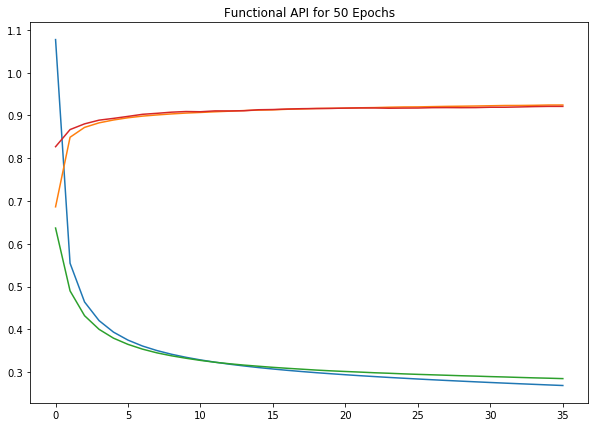

In [293]:
plt.plot(pd.DataFrame(history3.history))
plt.gcf().set_size_inches(10,7)
plt.title("Functional API for 50 Epochs")

Text(0.5, 1.0, 'Sequential API vs Functional API vs Functional API New Architecture')

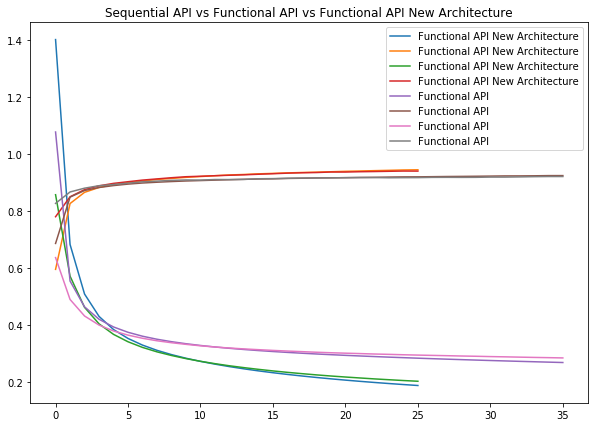

In [294]:
plt.plot(pd.DataFrame(history10.history), label='Functional API New Architecture')
plt.plot(pd.DataFrame(history3.history), label='Functional API')
plt.legend()
plt.gcf().set_size_inches(10,7)
plt.title("Sequential API vs Functional API vs Functional API New Architecture")

In [295]:
print("The Functional API contained a wide input and a deep input that used 5 hidden layers with a dimensionality of the output space of 30.")
print("The Functional API with a new architecture contained a 1 hidden layer of the wide input and a deep input that used 10 hidden layers with\na dimensionality of the output space of 50.")
print("The Functional API with a new architecture had around a 3.11% better accuracy for the testing set of " + str(test3[1]) + " compared to the Functional\nAPI at " + str(test2[1]) + ".")

The Functional API contained a wide input and a deep input that used 5 hidden layers with a dimensionality of the output space of 30.
The Functional API with a new architecture contained a 1 hidden layer of the wide input and a deep input that used 10 hidden layers with
a dimensionality of the output space of 50.
The Functional API with a new architecture had around a 3.11% better accuracy for the testing set of 0.9416 compared to the Functional
API at 0.9214.


### Analysis
Which NN was the best? What was its accuracy? Plot several of the misclassified images from this best model.

Text(0.5, 1.0, 'Sequential API vs Functional API vs Functional API New Architecture')

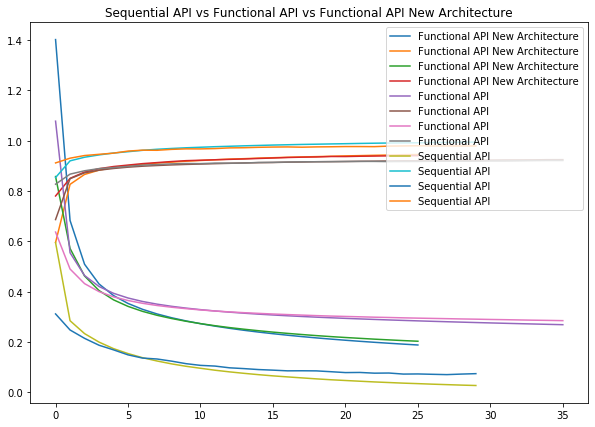

In [296]:
plt.plot(pd.DataFrame(history10.history), label='Functional API New Architecture')
plt.plot(pd.DataFrame(history3.history), label='Functional API')
plt.plot(pd.DataFrame(history.history), label='Sequential API')
plt.legend()
plt.gcf().set_size_inches(10,7)
plt.title("Sequential API vs Functional API vs Functional API New Architecture")

In [364]:
print("The best model was the Sequential API, followed by the Functional API New Architecture and the worst was the Functional API.")
print("The accuracies of the test set for Sequential API, Functional API, and Functional API New Architecture are:\n" + str(test[1]) + "\n" + str(test2[1]) + "\n" + str(test3[1]) + "\n")
print("If I wanted to improve the Functional API further, I would increase the dimensionality of the output space to 500 for each\nof the layers.")
print("The Sequential API with a new architecture had around a 4.8% better accuracy for the testing set of " + str(test[1]) + " compared to the Functional\nAPI at " + str(test2[1]) + ".")
print("The Functional API with a new architecture had around a 3.11% better accuracy for the testing set of " + str(test3[1]) + " compared to the Functional\nAPI at " + str(test2[1]) + ".")
print("The Sequential API with a new architecture had around a 2.79% better accuracy for the testing set of " + str(test[1]) + " compared to the Functional\nAPI New Architecture at " + str(test3[1]) + ".")

The best model was the Sequential API, followed by the Functional API New Architecture and the worst was the Functional API.
The accuracies of the test set for Sequential API, Functional API, and Functional API New Architecture are:
0.9695
0.9214
0.9416

If I wanted to improve the Functional API further, I would increase the dimensionality of the output space to 500 for each
of the layers.
The Sequential API with a new architecture had around a 4.8% better accuracy for the testing set of 0.9695 compared to the Functional
API at 0.9214.
The Functional API with a new architecture had around a 3.11% better accuracy for the testing set of 0.9416 compared to the Functional
API at 0.9214.
The Sequential API with a new architecture had around a 2.79% better accuracy for the testing set of 0.9695 compared to the Functional
API New Architecture at 0.9416.


In [346]:
y_pred = model.predict_classes(X_train_full)
y_misclassifications = np.where(y_train_full != y_pred)
y_misclassifications

(array([   80,   132,   134, ..., 59747, 59783, 59915]),)

In [338]:
np.shape(y_misclassifications)

(1, 1479)

In [347]:
y_pred

array([5, 0, 4, ..., 5, 6, 8])

Text(0.5, 1.0, 'Misclassified 9 as 0')

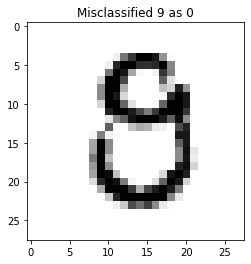

In [348]:
index = y_misclassifications[0][0].astype(int)
plt.imshow(X_train_full[index].reshape(28,28), cmap='binary')
plt.title("Misclassified " + str(y_train_full[index]) + " as " + str(y_pred[index]))

Text(0.5, 1.0, 'Misclassified 9 as 4')

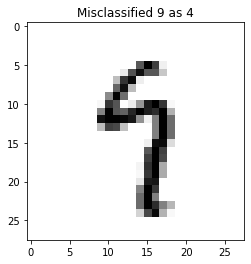

In [359]:
index = y_misclassifications[0][700].astype(int)
plt.imshow(X_train_full[index].reshape(28,28), cmap='binary')
plt.title("Misclassified " + str(y_train_full[index]) + " as " + str(y_pred[index]))

Text(0.5, 1.0, 'Misclassified 5 as 6')

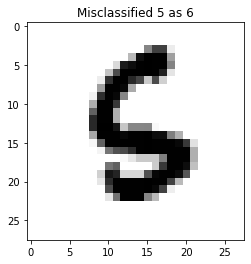

In [352]:
index = y_misclassifications[0][100].astype(int)
plt.imshow(X_train_full[index].reshape(28,28), cmap='binary')
plt.title("Misclassified " + str(y_train_full[index]) + " as " + str(y_pred[index]))

Text(0.5, 1.0, 'Misclassified 9 as 7')

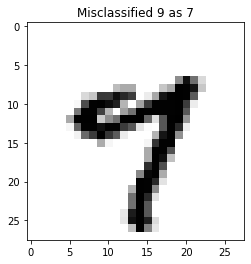

In [351]:
index = y_misclassifications[0][3].astype(int)
plt.imshow(X_train_full[index].reshape(28,28), cmap='binary')
plt.title("Misclassified " + str(y_train_full[index]) + " as " + str(y_pred[index]))